## APAN5420 Anomaly Detection - Assignment 4 

### Name: Kanyarat Suwannama

## Objectives
* Detect any hospital that may abuse the resources.
* Detect any hospital that may abuse the resources compared to its peers.
* Detect any hospital that may abuse the resources compared to the average (median etc) of its peers.
* Detect any hospital that may abuse the resources compared to the average (median etc) of its peers of the same DRG and State.
* Detect any hospital that may abuse the resources compared to the average (median etc) of its peers of the same DRG and City.
* Detect any hospital that may abuse the resources compared to the average (median etc) of its peers of the same DRG and Region.

## Data

* The Medicare Inpatient Hospitals by Geography and Service dataset provides information on hospital discharges for Original Medicare Part A beneficiaries by IPPS hospitals. This dataset contains information on the number of discharges, payments, and submitted charges organized by geography and Medicare Severity Diagnosis Related Group (DRG).

## FE
* We will focus on the "Average Total Payments", which is the "Total Payments / Total Discharges" to create the features.
* We will focus on the "Total discharges", which is the number of discharges billed by the provider for inpatient hospital services to create the features.
* We will focus on the "Average Medicare Payments", which is the "Medicare Payment Amount / Total Discharges" to create features.


## Table of Contents
* [Section 1: Data preparation](#Section_1)
    * [Section 1.1: Load data](#Section_11)
    * [Section 1.2: data preparation](#Section_12)
* [Section 2: EDA](#Section_2)
    * [Section 2.1: Distribution plots](#Section_21)
    * [Section 2.2: Count by state](#Section_22)    
    * [Section 2.3: Count of top cities](#Section_23)
    * [Section 2.4: Correlation Matrix](#Section_24)
* [Section 3: Feature engineering](#Section_3)
    * [Section 3.1: State & DRG Total Payment average](#Section_31)
    * [Section 3.2: City & DRG Total Payment average](#Section_32)
    * [Section 3.3: Region & DRG Total Payment average](#Section_33)
    * [Section 3.4: State & DRG Total Discharges average](#Section_34)
    * [Section 3.5: City & DRG Total Discharges average](#Section_35)
    * [Section 3.6: Region & DRG Total Discharges average](#Section_36)
    * [Section 3.7: State & DRG Medicare Payments average](#Section_37) 
    * [Section 3.8: City & DRG Medicare Payments average](#Section_38)
    * [Section 3.9: Region & DRG Medicare Payments average](#Section_39)
    * [Section 3.10: Region, State & DRG Medicare Payments average](#Section_40)
* [Section 4: Conclusion](#Section_4)

## Section 1: Data preparation <a class="anchor" id="Section_1"></a>
### Section 1.1: Load Data <a class="anchor" id="Section_11"></a>
* Import packages and data 
* Rename column
* Change data type and transfer spending amount with dollar sign into numeric
* Understand the data strcuture. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('inpatientCharges.csv')

In [3]:
df.describe()

,Provider Id,Provider Zip Code,Total Discharges
count,163065.000000,163065.000000,163065.000000
mean,255569.865428,47938.121908,42.776304
std,151563.671767,27854.323080,51.104042
min,10001.000000,1040.000000,11.000000
25%,110092.000000,27261.000000,17.000000
50%,250007.000000,44309.000000,27.000000
75%,380075.000000,72901.000000,49.000000
max,670077.000000,99835.000000,3383.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype 
---  ------                                --------------   ----- 
 0   DRG Definition                        163065 non-null  object
 1   Provider Id                           163065 non-null  int64 
 2   Provider Name                         163065 non-null  object
 3   Provider Street Address               163065 non-null  object
 4   Provider City                         163065 non-null  object
 5   Provider State                        163065 non-null  object
 6   Provider Zip Code                     163065 non-null  int64 
 7   Hospital Referral Region Description  163065 non-null  object
 8    Total Discharges                     163065 non-null  int64 
 9    Average Covered Charges              163065 non-null  object
 10   Average Total Payments               163065 non-null  object
 11  Average Medic

In [5]:
df.columns = ['DRG','Provider_Id', 'Provider_Name','Provider_StreetAddress','Provider_City',
               'Provider_State','Provider_Zipcode','Hospital_referral_region_desp',
                'Total_Discharges','Average_Covered_Charges','Average_Total_Payments',
                'Average_Medicare_Payment']
df = df.drop('Average_Covered_Charges',axis=1)

In [6]:
df.head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$5658.33,$4851.44


In [7]:
# Distribution plots of average total payments 
df['Average_Total_Payments'].describe()

count       163065
unique      147842
top       $4370.00
freq             9
Name: Average_Total_Payments, dtype: object

In [8]:
# Change data type and transfer spending amount with dollar sign into numeric
df['DRG'] = df['DRG'].astype('category')
df['Provider_State'] = df['Provider_State'].astype('category')
df['Provider_City'] = df['Provider_City'].astype('category')
df['Provider_Id'] = df['Provider_Id'].astype('category')
df['Average_Total_Payments'] = (df['Average_Total_Payments']
                              .str.replace(r'[^-+\d.]', '').astype(float))
df['Average_Medicare_Payment'] = (df['Average_Medicare_Payment']
                              .str.replace(r'[^-+\d.]', '').astype(float))

/var/folders/4q/w1lktl152hx0j0gq933rclnh0000gn/T/ipykernel_14427/976114077.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Average_Total_Payments'] = (df['Average_Total_Payments']
/var/folders/4q/w1lktl152hx0j0gq933rclnh0000gn/T/ipykernel_14427/976114077.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Average_Medicare_Payment'] = (df['Average_Medicare_Payment']


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   DRG                            163065 non-null  category
 1   Provider_Id                    163065 non-null  category
 2   Provider_Name                  163065 non-null  object  
 3   Provider_StreetAddress         163065 non-null  object  
 4   Provider_City                  163065 non-null  category
 5   Provider_State                 163065 non-null  category
 6   Provider_Zipcode               163065 non-null  int64   
 7   Hospital_referral_region_desp  163065 non-null  object  
 8   Total_Discharges               163065 non-null  int64   
 9   Average_Total_Payments         163065 non-null  float64 
 10  Average_Medicare_Payment       163065 non-null  float64 
dtypes: category(4), float64(2), int64(2), object(3)
memory usage: 9.9+ MB


## Section 2: EDA <a class="anchor" id="Section_2"></a>

### Section 2.1: Distribution plots <a class="anchor" id="Section_21"></a>

In [10]:
# Distribution plots of average total payments 
df['Average_Total_Payments'].describe()

count    163065.000000
mean       9707.473804
std        7664.642598
min        2673.000000
25%        5234.500000
50%        7214.100000
75%       11286.400000
max      156158.180000
Name: Average_Total_Payments, dtype: float64

<AxesSubplot:xlabel='Average_Total_Payments', ylabel='Count'>

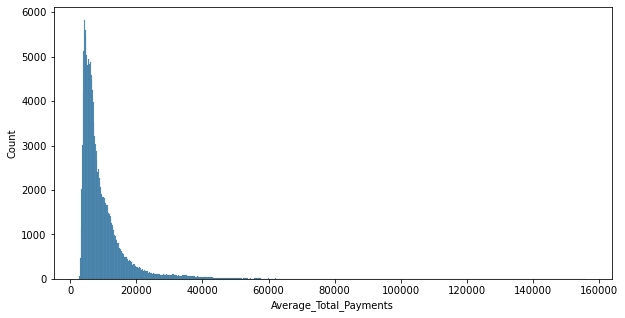

In [11]:
plt.figure(figsize=(10,5)) # Plot a graph with reasonable size.
sns.histplot(df['Average_Total_Payments'])
# plt.plot(data['Average_Total_Payments'])

<AxesSubplot:xlabel='Average_Total_Payments'>

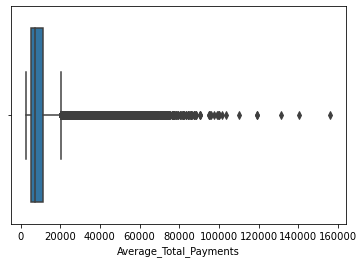

In [12]:
sns.boxplot(x = 'Average_Total_Payments', data = df) 

In [13]:
# Distribution plots of Total_Discharges
df['Total_Discharges'].describe()

count    163065.000000
mean         42.776304
std          51.104042
min          11.000000
25%          17.000000
50%          27.000000
75%          49.000000
max        3383.000000
Name: Total_Discharges, dtype: float64

<AxesSubplot:xlabel='Total_Discharges', ylabel='Count'>

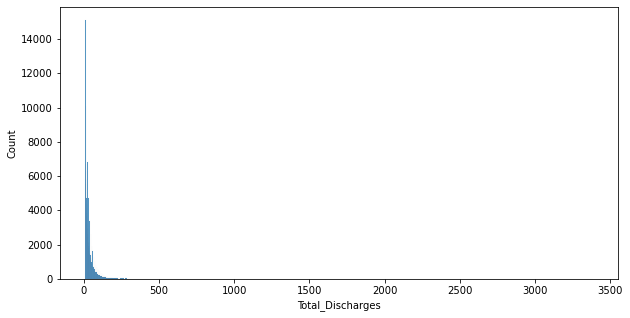

In [14]:
plt.figure(figsize=(10,5)) 
sns.histplot(df['Total_Discharges'])

<AxesSubplot:xlabel='Total_Discharges'>

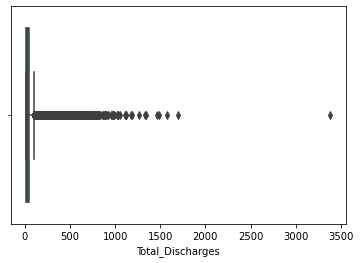

In [15]:
sns.boxplot(x = 'Total_Discharges', data = df)

In [16]:
# Distribution plots of Average_Medicare_Payment
df['Average_Medicare_Payment'].describe()

count    163065.000000
mean       8494.490964
std        7309.467261
min        1148.900000
25%        4192.350000
50%        6158.460000
75%       10056.880000
max      154620.810000
Name: Average_Medicare_Payment, dtype: float64

<AxesSubplot:xlabel='Average_Medicare_Payment', ylabel='Count'>

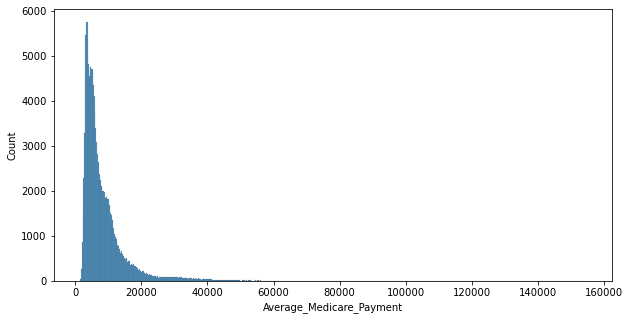

In [17]:
plt.figure(figsize=(10,5)) 
sns.histplot(df['Average_Medicare_Payment'])

<AxesSubplot:xlabel='Average_Medicare_Payment'>

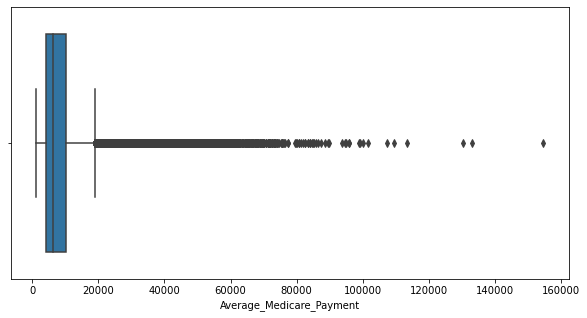

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(x = 'Average_Medicare_Payment', data = df)

* We find that most of the all of the discharges are over and mosty less that 50.
* We also find that the average total payment and average medicare payment follow similar pattern, mostly less than 10,000 dollars but significant number of outliers upto 156,158 dollars.

### Section 2.2: Count by State <a class="anchor" id="Section_22"></a>

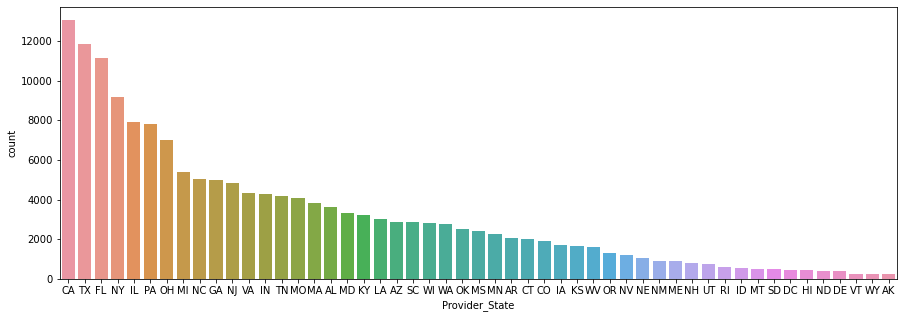

In [19]:
# data['Provider_State'].value_counts()
plt.figure(figsize=(15,5))
sns.countplot(x='Provider_State',data=df,order=df['Provider_State'].value_counts().index)
#plt.xticks(rotation = 90)
#ax = plt.gca()
#for p in ax.patches:
#    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
#            fontsize=12, color='blue', ha='center', va='bottom')
plt.rcParams["axes.labelsize"] = 20

* From this histogram, California, Texas, and Florid has the highest number of hospital divisions.

### Section 2.3: Count of top 20 cities <a class="anchor" id="Section_23"></a>

In [20]:
df['Provider_Name'].value_counts()

GOOD SAMARITAN HOSPITAL                  633
ST JOSEPH MEDICAL CENTER                 427
MERCY MEDICAL CENTER                     357
MERCY HOSPITAL                           347
ST JOSEPH HOSPITAL                       343
                                        ... 
J PAUL JONES HOSPITAL                      1
GREATER BATON ROUGE SURGICAL HOSPITAL      1
FAIRWAY MEDICAL CENTER                     1
MONROE SURGICAL HOSPITAL                   1
EAGLEVILLE HOSPITAL                        1
Name: Provider_Name, Length: 3201, dtype: int64

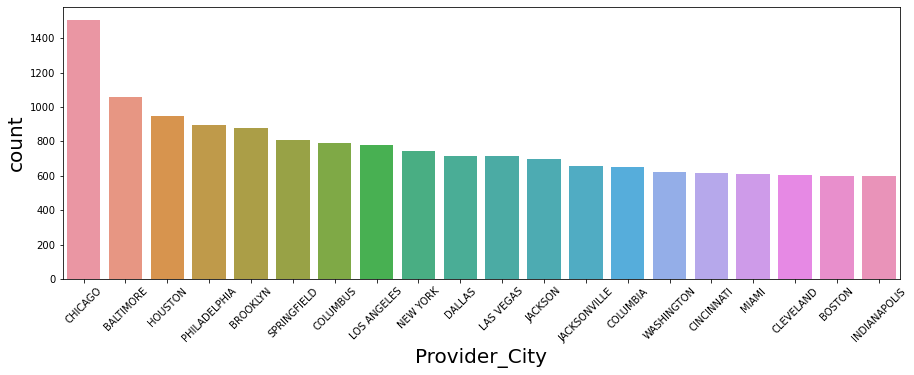

In [21]:
plt.figure(figsize=(15,5))
txt = df['Provider_City'].value_counts()[:20].index

chart = sns.countplot(
    x='Provider_City' ,data=df , order=txt
)

_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.rcParams["axes.labelsize"] = 10

* Even though the number of hospital divisions in State Illinois and State Maryland are not ranking top in the State group bys, their hospital divisions rank the most when looking at the city group bys (Chicago and Baltimore).

#### Thought process:
- The following shows the average medicare payment by DRG. Does it make sense to compare "917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC" with "885 - PSYCHOSES"?

In [22]:
df.groupby('DRG')['Average_Total_Payments'].describe().reset_index()

,DRG,count,mean,std,min,25%,50%,75%,max
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,1079.0,6960.534004,1477.873952,4968.00,6001.8300,6582.890,7516.825,18420.56
1,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,1201.0,6706.276445,2033.965862,4194.09,5412.8700,6093.750,7345.360,25519.43
2,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,1659.0,13263.823032,3847.918207,8174.28,10762.2200,12084.700,14424.325,50882.40
3,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,2269.0,7922.671141,2084.658336,5368.73,6626.2700,7280.050,8503.060,26510.15
4,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,1806.0,5713.985221,1342.538675,3916.41,4819.3250,5326.025,6197.480,14744.05
...,...,...,...,...,...,...,...,...,...
95,885 - PSYCHOSES,613.0,6968.721876,2440.280958,4444.90,5477.2400,6155.560,7841.280,32200.77
96,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,906.0,4949.907307,1462.463278,3172.44,3969.9675,4529.535,5440.675,18630.92
97,917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,843.0,10763.814413,2823.004637,6942.83,8851.4550,10062.280,11788.675,33251.14
98,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,1382.0,4485.378734,1154.328951,3040.72,3720.5725,4136.105,4879.390,12479.80


In [23]:
# Distribution plots of average total payments 
df['Total_Discharges'].describe()

count    163065.000000
mean         42.776304
std          51.104042
min          11.000000
25%          17.000000
50%          27.000000
75%          49.000000
max        3383.000000
Name: Total_Discharges, dtype: float64

### Section 2.4: Correlation Matrix <a class="anchor" id="Section_24"></a>
* To examine the correlation between the variables and find that the charges a highly correlated.

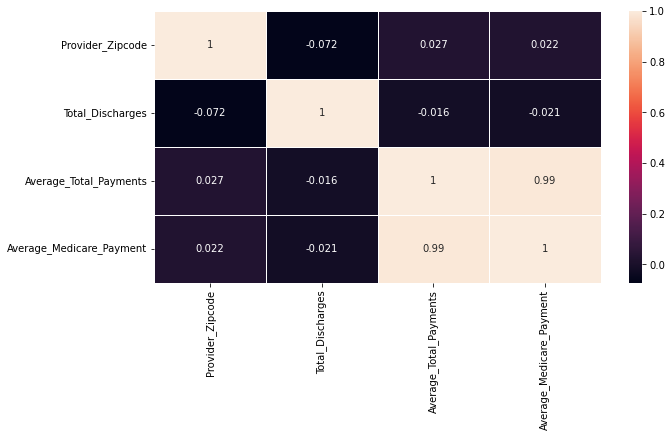

In [24]:
corr_matrix = df.corr()
ax = plt.subplots(figsize=(10,5)) 
sns.heatmap(corr_matrix, annot=True, linewidths=.5)
plt.show()

## Section 3: Feature Engineering <a class="anchor" id="Section_3"></a>

### Section 3.1: State & DRG Total Payment average <a class="anchor" id="Section_31"></a>
- Calculating average ratio of Average Total Payment of every Provider state in DRG description. This will help understand the average total payment comparisons within the state in each DRG category. 

In [25]:
benchmark = df.groupby(['Provider_State','DRG'])['Average_Total_Payments'].mean().reset_index()
benchmark.columns = ['Provider_State','DRG','Avg_Payment_ByStateDRG']
benchmark.head()

,Provider_State,DRG,Avg_Payment_ByStateDRG
0,AK,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,8401.950000
1,AK,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,8799.000000
2,AK,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,21608.010000
3,AK,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,12555.548333
4,AK,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,9275.867500


In [26]:
# add the new feature average spending to the dataset 
df1 = pd.merge(df, benchmark, how='left', on=['Provider_State','DRG'])
# Feature 1: ratio of amount spending and average spending by drg in a state
df1['Avg_Payment_ByStateDRG_ratio_amount'] = np.where(df1['Avg_Payment_ByStateDRG']==0,0, df1['Average_Total_Payments'] / df1['Avg_Payment_ByStateDRG'])
df1['Avg_Payment_ByStateDRG_ratio_amount'].describe()

count    163065.000000
mean          1.000000
std           0.195274
min           0.384805
25%           0.880824
50%           0.956830
75%           1.064688
max           7.857934
Name: Avg_Payment_ByStateDRG_ratio_amount, dtype: float64

In [27]:
var = 'Avg_Payment_ByStateDRG_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df1[binned_var] = pd.qcut( df1[var],percentile)
df1[['Avg_Payment_ByStateDRG_ratio_amount_D']]

,Avg_Payment_ByStateDRG_ratio_amount_D
0,"(0.957, 1.102]"
1,"(0.957, 1.102]"
2,"(0.864, 0.957]"
3,"(0.864, 0.957]"
4,"(0.957, 1.102]"
...,...
163060,"(0.785, 0.864]"
163061,"(0.864, 0.957]"
163062,"(1.102, 1.383]"
163063,"(1.383, 1.663]"


[Text(0, 0, '(0.384, 0.694]'),
 Text(1, 0, '(0.694, 0.785]'),
 Text(2, 0, '(0.785, 0.864]'),
 Text(3, 0, '(0.864, 0.957]'),
 Text(4, 0, '(0.957, 1.102]'),
 Text(5, 0, '(1.102, 1.383]'),
 Text(6, 0, '(1.383, 1.663]'),
 Text(7, 0, '(1.663, 7.858]')]

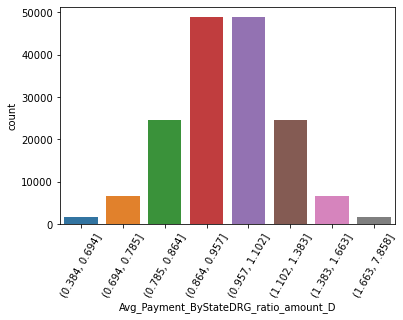

In [28]:
plt.figure(figsize=(6,4))
g = sns.countplot(x="Avg_Payment_ByStateDRG_ratio_amount_D", data=df1)
g.set_xticklabels(g.get_xticklabels(), rotation=60)

#### Thought process:
- If the ratio is larger than 1.663, then there is probably a fraudulent. 

In [29]:
len(df1[df1['Avg_Payment_ByStateDRG_ratio_amount']>1.663]['Provider_Name'])

1627

In [30]:
len(df1[df1['Avg_Payment_ByStateDRG_ratio_amount']>1.663]['Provider_Name'].unique())

295

In [31]:
df1[df1['Avg_Payment_ByStateDRG_ratio_amount']>1.663].head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Avg_Payment_ByStateDRG,Avg_Payment_ByStateDRG_ratio_amount,Avg_Payment_ByStateDRG_ratio_amount_D
104,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50334,SALINAS VALLEY MEMORIAL HOSPITAL,450 EAST ROMIE LANE,SALINAS,CA,93901,CA - Salinas,17,16744.82,7051.05,8387.932687,1.996299,"(1.663, 7.858]"
280,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,140008,LOYOLA GOTTLIEB MEMORIAL HOSPITAL,701 WEST NORTH AVE,MELROSE PARK,IL,60160,IL - Melrose Park,16,18420.56,4401.87,7376.789808,2.497097,"(1.663, 7.858]"
294,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,140080,RHC ST FRANCIS HOSPITAL,355 RIDGE AVE,EVANSTON,IL,60202,IL - Evanston,12,17347.00,6934.08,7376.789808,2.351565,"(1.663, 7.858]"
456,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,210029,JOHNS HOPKINS BAYVIEW MEDICAL CENTER,4940 EASTERN AVENUE,BALTIMORE,MD,21224,MD - Baltimore,11,16878.45,15855.18,9081.858095,1.858480,"(1.663, 7.858]"
537,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,240063,ST JOSEPH'S HOSPITAL,45 WEST 10TH STREET,SAINT PAUL,MN,55102,MN - St. Paul,14,13234.35,4930.28,7696.400000,1.719551,"(1.663, 7.858]"


### Section 3.2: City & DRG Total Payment average <a class="anchor" id="Section_32"></a>
- Calculating average ratio of Average Total Payment of every Provider city in DRG description. This will help understand the average total payment comparisons within the city. 

In [32]:
benchmark = df.groupby(['Provider_City','DRG'])['Average_Total_Payments'].median().reset_index()
benchmark.columns = ['Provider_City','DRG','Average_Payment_ByCityDRG']
benchmark.head()

,Provider_City,DRG,Average_Payment_ByCityDRG
0,ABBEVILLE,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,NaN
1,ABBEVILLE,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,NaN
2,ABBEVILLE,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,NaN
3,ABBEVILLE,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,NaN
4,ABBEVILLE,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,NaN


In [33]:
# add the new feature average spending to the dataset 
df2 = pd.merge(df, benchmark, how='left', on=['Provider_City','DRG'])
# Feature 3: ratio of amount spending and average spending by drg in a city
df2['Average_Payment_ByCityDRG_ratio_amount'] = np.where(df2['Average_Payment_ByCityDRG']==0,0, df2['Average_Total_Payments'] / df2['Average_Payment_ByCityDRG'])
df2['Average_Payment_ByCityDRG_ratio_amount'].describe()

count    163065.000000
mean          1.011287
std           0.120431
min           0.238195
25%           1.000000
50%           1.000000
75%           1.000000
max           5.591943
Name: Average_Payment_ByCityDRG_ratio_amount, dtype: float64

In [34]:
var = 'Average_Payment_ByCityDRG_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df2[binned_var] = pd.qcut( df2[var],percentile)
df2[['Average_Payment_ByCityDRG_ratio_amount_D']]

,Average_Payment_ByCityDRG_ratio_amount_D
0,"(1.019, 1.212]"
1,"(0.982, 1.0]"
2,"(0.735, 0.853]"
3,"(0.853, 0.982]"
4,"(0.982, 1.0]"
...,...
163060,"(0.982, 1.0]"
163061,"(0.853, 0.982]"
163062,"(0.982, 1.0]"
163063,"(0.982, 1.0]"


[Text(0, 0, '(0.237, 0.735]'),
 Text(1, 0, '(0.735, 0.853]'),
 Text(2, 0, '(0.853, 0.982]'),
 Text(3, 0, '(0.982, 1.0]'),
 Text(4, 0, '(1.0, 1.019]'),
 Text(5, 0, '(1.019, 1.212]'),
 Text(6, 0, '(1.212, 1.499]'),
 Text(7, 0, '(1.499, 5.592]')]

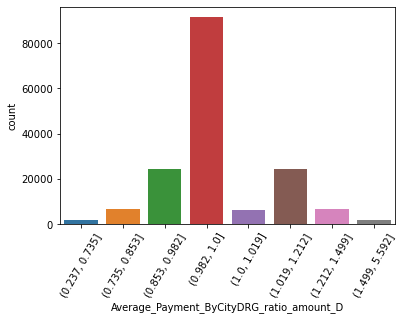

In [35]:
plt.figure(figsize=(6,4))
g = sns.countplot(x="Average_Payment_ByCityDRG_ratio_amount_D", data=df2)
g.set_xticklabels(g.get_xticklabels(), rotation=60)

#### Thought process:
- If the ratio is larger than 1.499, then there is probably a fraudulent. 

In [36]:
len(df2[df2['Average_Payment_ByCityDRG_ratio_amount']>1.499])

1634

In [37]:
len(df2[df2['Average_Payment_ByCityDRG_ratio_amount']>1.499]['Provider_Name'].unique())

210

In [38]:
df2[df2['Average_Payment_ByCityDRG_ratio_amount']>1.499].head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Average_Payment_ByCityDRG,Average_Payment_ByCityDRG_ratio_amount,Average_Payment_ByCityDRG_ratio_amount_D
73,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,50058,GLENDALE MEM HOSPITAL & HLTH CENTER,1420 S CENTRAL AVE,GLENDALE,CA,91204,CA - Los Angeles,11,11082.18,10056.00,7046.000,1.572833,"(1.499, 5.592]"
245,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,110010,EMORY UNIVERSITY HOSPITAL,"1364 CLIFTON ROAD, NE",ATLANTA,GA,30322,GA - Atlanta,26,9719.03,6058.38,5528.840,1.757879,"(1.499, 5.592]"
347,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,150056,INDIANA UNIVERSITY HEALTH,1701 N SENATE BLVD,INDIANAPOLIS,IN,46206,IN - Indianapolis,82,9764.93,7054.52,6102.040,1.600273,"(1.499, 5.592]"
456,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,210029,JOHNS HOPKINS BAYVIEW MEDICAL CENTER,4940 EASTERN AVENUE,BALTIMORE,MD,21224,MD - Baltimore,11,16878.45,15855.18,10352.720,1.630340,"(1.499, 5.592]"
544,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,250001,UNIVERSITY OF MISSISSIPPI MED CENTER,2500 N STATE ST,JACKSON,MS,39216,MS - Jackson,11,10017.36,6677.54,6190.445,1.618197,"(1.499, 5.592]"


### Section 3.3: Region & DRG Total Payment average <a class="anchor" id="Section_33"></a>
- Calculating average ratio of Average Total Payment of every Hospital referral region desp in DRG description. This will help understand the average total payment comparisons within the region. 

In [39]:
benchmark = df.groupby(['Hospital_referral_region_desp','DRG'])['Average_Total_Payments'].mean().reset_index()
benchmark.columns = ['Hospital_referral_region_desp','DRG','Avg_Payment_ByRegionDRG']
benchmark.head()

,Hospital_referral_region_desp,DRG,Avg_Payment_ByRegionDRG
0,AK - Anchorage,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,8401.950000
1,AK - Anchorage,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,8799.000000
2,AK - Anchorage,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,21608.010000
3,AK - Anchorage,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,12555.548333
4,AK - Anchorage,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,9275.867500


In [40]:
# add the new feature average spending to the dataset 
df3 = pd.merge(df, benchmark, how='left', on=['Hospital_referral_region_desp','DRG'])
# Feature 3: ratio of amount spending and average spending by drg in a region 
df3['Avg_Payment_ByRegionDRG_ratio_amount'] = np.where(df3['Avg_Payment_ByRegionDRG']==0,0, df3['Average_Total_Payments'] / df3['Avg_Payment_ByRegionDRG'])
df3['Avg_Payment_ByRegionDRG_ratio_amount'].describe()

count    163065.000000
mean          1.000000
std           0.159145
min           0.271255
25%           0.902856
50%           0.977701
75%           1.057561
max           4.848303
Name: Avg_Payment_ByRegionDRG_ratio_amount, dtype: float64

In [41]:
var = 'Avg_Payment_ByRegionDRG_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df3[binned_var] = pd.qcut( df3[var],percentile)
df3[['Avg_Payment_ByRegionDRG_ratio_amount_D']]

,Avg_Payment_ByRegionDRG_ratio_amount_D
0,"(0.978, 1.085]"
1,"(0.978, 1.085]"
2,"(0.885, 0.978]"
3,"(0.885, 0.978]"
4,"(0.978, 1.085]"
...,...
163060,"(0.803, 0.885]"
163061,"(0.803, 0.885]"
163062,"(1.085, 1.305]"
163063,"(1.544, 4.848]"


[Text(0, 0, '(0.27, 0.734]'),
 Text(1, 0, '(0.734, 0.803]'),
 Text(2, 0, '(0.803, 0.885]'),
 Text(3, 0, '(0.885, 0.978]'),
 Text(4, 0, '(0.978, 1.085]'),
 Text(5, 0, '(1.085, 1.305]'),
 Text(6, 0, '(1.305, 1.544]'),
 Text(7, 0, '(1.544, 4.848]')]

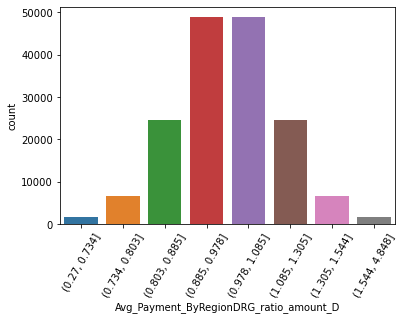

In [42]:
plt.figure(figsize=(6,4))
g = sns.countplot(x="Avg_Payment_ByRegionDRG_ratio_amount_D", data=df3)
g.set_xticklabels(g.get_xticklabels(), rotation=60)

#### Thought process:
- If the ratio is larger than 1.544, then there is probably a fraudulent. 

In [43]:
len(df3[df3['Avg_Payment_ByRegionDRG_ratio_amount']>1.544])

1630

In [44]:
len(df3[df3['Avg_Payment_ByRegionDRG_ratio_amount']>1.544]['Provider_Name'].unique())

295

In [45]:
df3[df3['Avg_Payment_ByRegionDRG_ratio_amount']>1.544].head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Avg_Payment_ByRegionDRG,Avg_Payment_ByRegionDRG_ratio_amount,Avg_Payment_ByRegionDRG_ratio_amount_D
59,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,40078,NATIONAL PARK MEDICAL CENTER,1910 MALVERN AVENUE,HOT SPRINGS,AR,71901,AR - Little Rock,18,9838.11,8533.83,6309.002222,1.559377,"(1.544, 4.848]"
280,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,140008,LOYOLA GOTTLIEB MEMORIAL HOSPITAL,701 WEST NORTH AVE,MELROSE PARK,IL,60160,IL - Melrose Park,16,18420.56,4401.87,9360.371667,1.967930,"(1.544, 4.848]"
294,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,140080,RHC ST FRANCIS HOSPITAL,355 RIDGE AVE,EVANSTON,IL,60202,IL - Evanston,12,17347.00,6934.08,9802.682500,1.769618,"(1.544, 4.848]"
456,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,210029,JOHNS HOPKINS BAYVIEW MEDICAL CENTER,4940 EASTERN AVENUE,BALTIMORE,MD,21224,MD - Baltimore,11,16878.45,15855.18,9302.277500,1.814443,"(1.544, 4.848]"
690,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,330195,LONG ISLAND JEWISH MEDICAL CENTER,270 - 05 76TH AVENUE,NEW HYDE PARK,NY,11040,NY - East Long Island,11,13895.09,13280.54,8885.493750,1.563795,"(1.544, 4.848]"


### Section 3.4: State & DRG Total Discharges average <a class="anchor" id="Section_34"></a>
- Calculating average ratio of total discharges of every Provider state in DRG description. This will help understand the total discharges comparisons within the state. 

In [46]:
benchmark = df.groupby(['Provider_State','DRG'])['Total_Discharges'].mean().reset_index()
benchmark.columns = ['Provider_State','DRG','Avg_Discharges_ByStateDRG']
benchmark.head()

,Provider_State,DRG,Avg_Discharges_ByStateDRG
0,AK,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,23.000000
1,AK,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,11.000000
2,AK,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,22.500000
3,AK,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,25.333333
4,AK,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,21.000000


In [47]:
# add the new feature average total discharges to the dataset 
df4 = pd.merge(df, benchmark, how='left', on=['Provider_State','DRG'])
# Feature 4: ratio of amount total discharges and average total discharges by drg in a state 
df4['Avg_Discharges_ByStateDRG_ratio_amount'] = np.where(df4['Avg_Discharges_ByStateDRG']==0,0, df4['Total_Discharges'] / df4['Avg_Discharges_ByStateDRG'])
df4['Avg_Discharges_ByStateDRG_ratio_amount'].describe()

count    163065.000000
mean          1.000000
std           0.686087
min           0.045025
25%           0.550452
50%           0.819820
75%           1.251471
max          24.624593
Name: Avg_Discharges_ByStateDRG_ratio_amount, dtype: float64

In [48]:
var = 'Avg_Discharges_ByStateDRG_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df4[binned_var] = pd.qcut( df4[var],percentile)
df4[['Avg_Discharges_ByStateDRG_ratio_amount_D']]

,Avg_Discharges_ByStateDRG_ratio_amount_D
0,"(2.287, 3.472]"
1,"(0.305, 0.5]"
2,"(0.5, 0.82]"
3,"(0.5, 0.82]"
4,"(0.305, 0.5]"
...,...
163060,"(0.82, 1.388]"
163061,"(0.305, 0.5]"
163062,"(0.5, 0.82]"
163063,"(0.305, 0.5]"


[Text(0, 0, '(0.044, 0.19]'),
 Text(1, 0, '(0.19, 0.305]'),
 Text(2, 0, '(0.305, 0.5]'),
 Text(3, 0, '(0.5, 0.82]'),
 Text(4, 0, '(0.82, 1.388]'),
 Text(5, 0, '(1.388, 2.287]'),
 Text(6, 0, '(2.287, 3.472]'),
 Text(7, 0, '(3.472, 24.625]')]

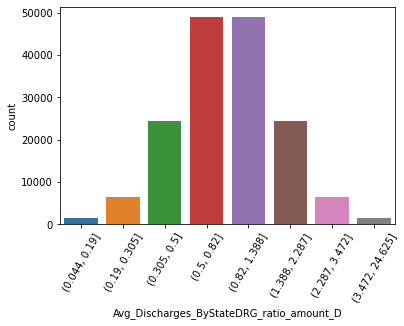

In [49]:
plt.figure(figsize=(6,4))
g = sns.countplot(x="Avg_Discharges_ByStateDRG_ratio_amount_D", data=df4)
g.set_xticklabels(g.get_xticklabels(), rotation=60)

#### Thought process:
- If the ratio is larger than 3.472, then there is probably a fraudulent. 

In [50]:
len(df4[df4['Avg_Discharges_ByStateDRG_ratio_amount']>3.472])

1633

In [51]:
len(df4[df4['Avg_Discharges_ByStateDRG_ratio_amount']>3.472]['Provider_Name'].unique())

400

In [52]:
df4[df4['Avg_Discharges_ByStateDRG_ratio_amount']>3.472].head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Avg_Discharges_ByStateDRG,Avg_Discharges_ByStateDRG_ratio_amount,Avg_Discharges_ByStateDRG_ratio_amount_D
8,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10039,HUNTSVILLE HOSPITAL,101 SIVLEY RD,HUNTSVILLE,AL,35801,AL - Huntsville,135,6113.38,5228.40,38.217391,3.532423,"(3.472, 24.625]"
394,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,170186,KANSAS HEART HOSPITAL,3601 NORTH WEBB ROAD,WICHITA,KS,67226,KS - Wichita,190,5332.51,4311.03,37.125000,5.117845,"(3.472, 24.625]"
440,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,190263,HEART HOSPITAL OF LAFAYETTE,1105 KALISTE SALOOM ROAD,LAFAYETTE,LA,70508,LA - Lafayette,110,5348.60,4115.00,29.720000,3.701211,"(3.472, 24.625]"
603,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,280128,NEBRASKA HEART HOSPITAL,7500 SOUTH 91ST ST,LINCOLN,NE,68526,NE - Lincoln,125,5519.41,4495.55,35.333333,3.537736,"(3.472, 24.625]"
679,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,330140,ST JOSEPH'S HOSPITAL HEALTH CENTER,301 PROSPECT AVENUE,SYRACUSE,NY,13203,NY - Syracuse,137,6673.68,5471.58,29.043478,4.717066,"(3.472, 24.625]"


### Section 3.5: City & DRG Total Discharge average <a class="anchor" id="Section_35"></a>
- Calculating average ratio of total discharges of every Provider city in DRG description. This will help understand the total discharges comparisons within the city. 

In [53]:
benchmark = df.groupby(['Provider_City','DRG'])['Total_Discharges'].mean().reset_index()
benchmark.columns = ['Provider_City','DRG','Avg_Discharges_ByCityDRG']
benchmark.head()

,Provider_City,DRG,Avg_Discharges_ByCityDRG
0,ABBEVILLE,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,NaN
1,ABBEVILLE,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,NaN
2,ABBEVILLE,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,NaN
3,ABBEVILLE,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,NaN
4,ABBEVILLE,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,NaN


In [54]:
# add the new feature average total discharges to the dataset 
df5 = pd.merge(df, benchmark, how='left', on=['Provider_City','DRG'])
# Feature 5: ratio of amount total discharges and average total discharges by drg in a city
df5['Avg_Discharges_ByCityDRG_ratio_amount'] = np.where(df5['Avg_Discharges_ByCityDRG']==0,0, df5['Total_Discharges'] / df5['Avg_Discharges_ByCityDRG'])
df5['Avg_Discharges_ByCityDRG_ratio_amount'].describe()

count    163065.000000
mean          1.000000
std           0.356433
min           0.019540
25%           0.920000
50%           1.000000
75%           1.000000
max           5.689303
Name: Avg_Discharges_ByCityDRG_ratio_amount, dtype: float64

In [55]:
var = 'Avg_Discharges_ByCityDRG_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df5[binned_var] = pd.qcut( df5[var],percentile)
df5[['Avg_Discharges_ByCityDRG_ratio_amount_D']]

,Avg_Discharges_ByCityDRG_ratio_amount_D
0,"(1.083, 1.614]"
1,"(0.809, 1.0]"
2,"(0.423, 0.809]"
3,"(0.809, 1.0]"
4,"(0.809, 1.0]"
...,...
163060,"(0.809, 1.0]"
163061,"(0.0185, 0.234]"
163062,"(0.809, 1.0]"
163063,"(0.809, 1.0]"


[Text(0, 0, '(0.0185, 0.234]'),
 Text(1, 0, '(0.234, 0.423]'),
 Text(2, 0, '(0.423, 0.809]'),
 Text(3, 0, '(0.809, 1.0]'),
 Text(4, 0, '(1.0, 1.083]'),
 Text(5, 0, '(1.083, 1.614]'),
 Text(6, 0, '(1.614, 2.25]'),
 Text(7, 0, '(2.25, 5.689]')]

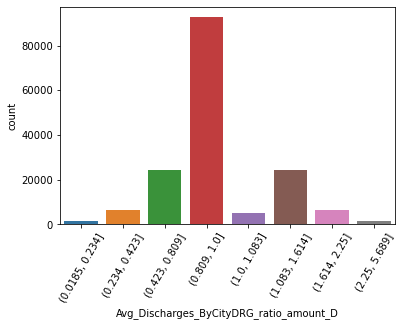

In [56]:
plt.figure(figsize=(6,4))
g = sns.countplot(x="Avg_Discharges_ByCityDRG_ratio_amount_D", data=df5)
g.set_xticklabels(g.get_xticklabels(), rotation=60)

#### Thought process:
- If the ratio is larger than 2.25, then there is probably a fraudulent. 

In [57]:
len(df5[df5['Avg_Discharges_ByCityDRG_ratio_amount']>2.25])

1624

In [58]:
len(df5[df5['Avg_Discharges_ByCityDRG_ratio_amount']>2.25]['Provider_Name'].unique())

294

In [59]:
df5[df5['Avg_Discharges_ByCityDRG_ratio_amount']>2.25].head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Avg_Discharges_ByCityDRG,Avg_Discharges_ByCityDRG_ratio_amount,Avg_Discharges_ByCityDRG_ratio_amount_D
394,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,170186,KANSAS HEART HOSPITAL,3601 NORTH WEBB ROAD,WICHITA,KS,67226,KS - Wichita,190,5332.51,4311.03,68.500000,2.773723,"(2.25, 5.689]"
440,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,190263,HEART HOSPITAL OF LAFAYETTE,1105 KALISTE SALOOM ROAD,LAFAYETTE,LA,70508,LA - Lafayette,110,5348.60,4115.00,42.333333,2.598425,"(2.25, 5.689]"
451,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,210015,FRANKLIN SQUARE HOSPITAL CENTER,9000 FRANKLIN SQUARE DR,BALTIMORE,MD,21237,MD - Baltimore,81,8596.79,7340.71,32.571429,2.486842,"(2.25, 5.689]"
571,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,260068,BOONE HOSPITAL CENTER,1600 E BROADWAY,COLUMBIA,MO,65201,MO - Columbia,111,5066.52,4065.29,39.333333,2.822034,"(2.25, 5.689]"
679,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,330140,ST JOSEPH'S HOSPITAL HEALTH CENTER,301 PROSPECT AVENUE,SYRACUSE,NY,13203,NY - Syracuse,137,6673.68,5471.58,60.666667,2.258242,"(2.25, 5.689]"


### Section 3.6: Region & DRG Total Discharge average <a class="anchor" id="Section_36"></a>
- Calculating average ratio of total discharges of every Hospital referral region desp in DRG description. This will help understand the total discharges comparisons within the region. 

In [60]:
benchmark = df.groupby(['Hospital_referral_region_desp','DRG'])['Total_Discharges'].mean().reset_index()
benchmark.columns = ['Hospital_referral_region_desp','DRG','Avg_Discharges_ByRegionDRG']
benchmark.head()

,Hospital_referral_region_desp,DRG,Avg_Discharges_ByRegionDRG
0,AK - Anchorage,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,23.000000
1,AK - Anchorage,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,11.000000
2,AK - Anchorage,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,22.500000
3,AK - Anchorage,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,25.333333
4,AK - Anchorage,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,21.000000


In [61]:
# add the new feature average total discharges to the dataset 
df6 = pd.merge(df, benchmark, how='left', on=['Hospital_referral_region_desp','DRG'])
# Feature 6: ratio of amount total discharges and average total discharges by drg in a region
df6['Avg_Discharges_ByRegionDRG_ratio_amount'] = np.where(df6['Avg_Discharges_ByRegionDRG']==0,0, df6['Total_Discharges'] / df6['Avg_Discharges_ByRegionDRG'])
df6['Avg_Discharges_ByRegionDRG_ratio_amount'].describe()

count    163065.000000
mean          1.000000
std           0.596288
min           0.015412
25%           0.592105
50%           0.886894
75%           1.250000
max          11.008786
Name: Avg_Discharges_ByRegionDRG_ratio_amount, dtype: float64

In [62]:
var = 'Avg_Discharges_ByRegionDRG_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df6[binned_var] = pd.qcut( df6[var], percentile)
df6[['Avg_Discharges_ByRegionDRG_ratio_amount_D']]

,Avg_Discharges_ByRegionDRG_ratio_amount_D
0,"(0.887, 1.369]"
1,"(0.321, 0.535]"
2,"(0.535, 0.887]"
3,"(0.887, 1.369]"
4,"(0.535, 0.887]"
...,...
163060,"(0.535, 0.887]"
163061,"(0.2, 0.321]"
163062,"(0.321, 0.535]"
163063,"(0.321, 0.535]"


[Text(0, 0, '(0.0144, 0.2]'),
 Text(1, 0, '(0.2, 0.321]'),
 Text(2, 0, '(0.321, 0.535]'),
 Text(3, 0, '(0.535, 0.887]'),
 Text(4, 0, '(0.887, 1.369]'),
 Text(5, 0, '(1.369, 2.098]'),
 Text(6, 0, '(2.098, 3.086]'),
 Text(7, 0, '(3.086, 11.009]')]

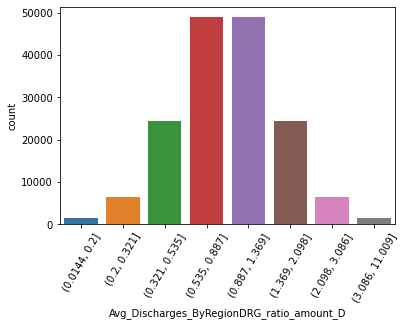

In [63]:
plt.figure(figsize=(6,4))
g = sns.countplot(x="Avg_Discharges_ByRegionDRG_ratio_amount_D", data=df6)
g.set_xticklabels(g.get_xticklabels(), rotation=60)

#### Thought process:
- If the ratio is larger than 3.086, then there is probably a fraudulent. 

In [64]:
len(df6[df6['Avg_Discharges_ByRegionDRG_ratio_amount']>3.086])

1630

In [65]:
len(df6[df6['Avg_Discharges_ByRegionDRG_ratio_amount']>3.086]['Provider_Name'].unique())

372

In [66]:
df6[df6['Avg_Discharges_ByRegionDRG_ratio_amount']>3.086].head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Avg_Discharges_ByRegionDRG,Avg_Discharges_ByRegionDRG_ratio_amount,Avg_Discharges_ByRegionDRG_ratio_amount_D
394,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,170186,KANSAS HEART HOSPITAL,3601 NORTH WEBB ROAD,WICHITA,KS,67226,KS - Wichita,190,5332.51,4311.03,45.375000,4.187328,"(3.086, 11.009]"
473,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,220071,MASSACHUSETTS GENERAL HOSPITAL,55 FRUIT STREET,BOSTON,MA,2114,MA - Boston,91,9265.93,8290.94,29.210526,3.115315,"(3.086, 11.009]"
571,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,260068,BOONE HOSPITAL CENTER,1600 E BROADWAY,COLUMBIA,MO,65201,MO - Columbia,111,5066.52,4065.29,35.333333,3.141509,"(3.086, 11.009]"
935,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,450135,TEXAS HEALTH HARRIS METHODIST FORT WORTH,1301 PENNSYLVANIA AVENUE,FORT WORTH,TX,76104,TX - Fort Worth,91,6442.84,5215.29,28.500000,3.192982,"(3.086, 11.009]"
1208,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,50625,CEDARS-SINAI MEDICAL CENTER,8700 BEVERLY BLVD,LOS ANGELES,CA,90048,CA - Los Angeles,81,8778.70,7420.71,19.833333,4.084034,"(3.086, 11.009]"


### Section 3.7: State & DRG Medicare Payments average <a class="anchor" id="Section_37"></a>
- Calculating average ratio of Average medicare payment of every Provider state in DRG description. This will help understand the average medicare payment comparisons within the state. 

In [67]:
benchmark = df.groupby(['Provider_State','DRG'])['Average_Medicare_Payment'].mean().reset_index()
benchmark.columns = ['Provider_State','DRG','Avg_Medicare_ByStateDRG']
benchmark.head()

,Provider_State,DRG,Avg_Medicare_ByStateDRG
0,AK,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,6413.780000
1,AK,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,8081.540000
2,AK,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,20555.255000
3,AK,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,11140.963333
4,AK,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,8258.427500


In [68]:
# add the new feature average total discharges to the dataset 
df7 = pd.merge(df, benchmark, how='left', on=['Provider_State','DRG'])
# Feature 7: ratio of amount total medicare payment and average medicare payment by drg in a state
df7['Avg_Medicare_ByStateDRG_ratio_amount'] = np.where(df7['Avg_Medicare_ByStateDRG']==0,0, df7['Average_Medicare_Payment'] / df7['Avg_Medicare_ByStateDRG'])
df7['Avg_Medicare_ByStateDRG_ratio_amount'].describe()

count    163065.000000
mean          1.000000
std           0.215091
min           0.339831
25%           0.868395
50%           0.954250
75%           1.071483
max           5.174415
Name: Avg_Medicare_ByStateDRG_ratio_amount, dtype: float64

In [69]:
var = 'Avg_Medicare_ByStateDRG_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df7[binned_var] = pd.qcut( df7[var], percentile)
df7[['Avg_Medicare_ByStateDRG_ratio_amount_D']]

,Avg_Medicare_ByStateDRG_ratio_amount_D
0,"(0.954, 1.111]"
1,"(0.954, 1.111]"
2,"(0.954, 1.111]"
3,"(0.849, 0.954]"
4,"(0.954, 1.111]"
...,...
163060,"(0.757, 0.849]"
163061,"(0.655, 0.757]"
163062,"(0.954, 1.111]"
163063,"(1.744, 5.174]"


[Text(0, 0, '(0.339, 0.655]'),
 Text(1, 0, '(0.655, 0.757]'),
 Text(2, 0, '(0.757, 0.849]'),
 Text(3, 0, '(0.849, 0.954]'),
 Text(4, 0, '(0.954, 1.111]'),
 Text(5, 0, '(1.111, 1.43]'),
 Text(6, 0, '(1.43, 1.744]'),
 Text(7, 0, '(1.744, 5.174]')]

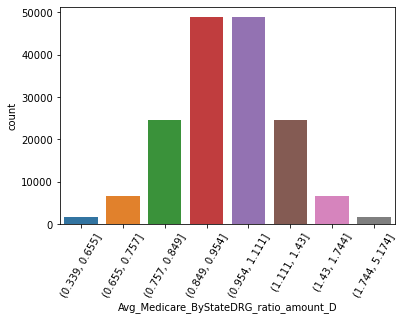

In [70]:
plt.figure(figsize=(6,4))
g = sns.countplot(x="Avg_Medicare_ByStateDRG_ratio_amount_D", data=df7)
g.set_xticklabels(g.get_xticklabels(), rotation=60)

#### Thought process:
- If the ratio is larger than 1.744, then there is probably a fraudulent.

In [71]:
len(df7[df7['Avg_Medicare_ByStateDRG_ratio_amount']>1.744])

1632

In [72]:
len(df7[df7['Avg_Medicare_ByStateDRG_ratio_amount']>1.744]['Provider_Name'].unique())

205

In [73]:
df7[df7['Avg_Medicare_ByStateDRG_ratio_amount']>1.744].head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Avg_Medicare_ByStateDRG,Avg_Medicare_ByStateDRG_ratio_amount,Avg_Medicare_ByStateDRG_ratio_amount_D
456,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,210029,JOHNS HOPKINS BAYVIEW MEDICAL CENTER,4940 EASTERN AVENUE,BALTIMORE,MD,21224,MD - Baltimore,11,16878.45,15855.18,8015.386190,1.978093,"(1.744, 5.174]"
690,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,330195,LONG ISLAND JEWISH MEDICAL CENTER,270 - 05 76TH AVENUE,NEW HYDE PARK,NY,11040,NY - East Long Island,11,13895.09,13280.54,6796.218043,1.954107,"(1.744, 5.174]"
1172,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,50276,CONTRA COSTA REGIONAL MEDICAL CENTER,2500 ALHAMBRA AVE,MARTINEZ,CA,94553,CA - Contra Costa County,23,19239.30,18363.08,7506.485256,2.446295,"(1.744, 5.174]"
1186,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,50376,LAC/HARBOR-UCLA MED CENTER,1000 W CARSON ST,TORRANCE,CA,90509,CA - Los Angeles,13,15070.23,14381.00,7506.485256,1.915810,"(1.744, 5.174]"
1191,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,50441,STANFORD HOSPITAL,300 PASTEUR DRIVE,STANFORD,CA,94305,CA - San Mateo County,16,25519.43,22553.56,7506.485256,3.004543,"(1.744, 5.174]"


### Section 3.8: City & DRG Medicare Payments average <a class="anchor" id="Section_38"></a>
- Calculating average ratio of Average medicare payment of every Provider city in DRG description. This will help understand the average medicare payment comparisons within the city. 

In [74]:
benchmark = df.groupby(['Provider_City','DRG'])['Average_Medicare_Payment'].mean().reset_index()
benchmark.columns = ['Provider_City','DRG','Avg_Medicare_ByCityDRG']
benchmark.head()

,Provider_City,DRG,Avg_Medicare_ByCityDRG
0,ABBEVILLE,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,NaN
1,ABBEVILLE,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,NaN
2,ABBEVILLE,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,NaN
3,ABBEVILLE,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,NaN
4,ABBEVILLE,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,NaN


In [75]:
# add the new feature average total discharges to the dataset 
df8 = pd.merge(df, benchmark, how='left', on=['Provider_City','DRG'])
# Feature 8: ratio of amount total medicare payment and average medicare payment by drg in a city
df8['Avg_Medicare_ByCityDRG_ratio_amount'] = np.where(df8['Avg_Medicare_ByCityDRG']==0,0, df8['Average_Medicare_Payment'] / df8['Avg_Medicare_ByCityDRG'])
df8['Avg_Medicare_ByCityDRG_ratio_amount'].describe()

count    163065.000000
mean          1.000000
std           0.119402
min           0.261737
25%           0.979755
50%           1.000000
75%           1.000000
max           3.846861
Name: Avg_Medicare_ByCityDRG_ratio_amount, dtype: float64

In [76]:
var = 'Avg_Medicare_ByCityDRG_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df8[binned_var] = pd.qcut( df8[var], percentile)
df8[['Avg_Medicare_ByCityDRG_ratio_amount_D']]

,Avg_Medicare_ByCityDRG_ratio_amount_D
0,"(1.023, 1.21]"
1,"(0.95, 1.0]"
2,"(0.809, 0.95]"
3,"(0.809, 0.95]"
4,"(0.95, 1.0]"
...,...
163060,"(0.95, 1.0]"
163061,"(0.261, 0.7]"
163062,"(0.95, 1.0]"
163063,"(0.95, 1.0]"


[Text(0, 0, '(0.261, 0.7]'),
 Text(1, 0, '(0.7, 0.809]'),
 Text(2, 0, '(0.809, 0.95]'),
 Text(3, 0, '(0.95, 1.0]'),
 Text(4, 0, '(1.0, 1.023]'),
 Text(5, 0, '(1.023, 1.21]'),
 Text(6, 0, '(1.21, 1.435]'),
 Text(7, 0, '(1.435, 3.847]')]

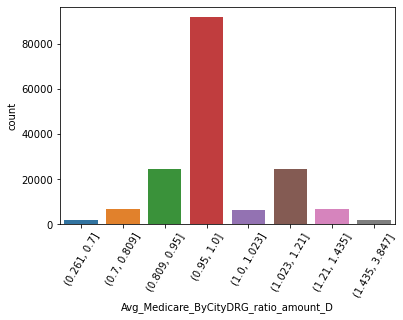

In [77]:
plt.figure(figsize=(6,4))
g = sns.countplot(x="Avg_Medicare_ByCityDRG_ratio_amount_D", data=df8)
g.set_xticklabels(g.get_xticklabels(), rotation=60)

#### Thought process:
- If the ratio is larger than 1.435, then there is probably a fraudulent.

In [78]:
len(df8[df8['Avg_Medicare_ByCityDRG_ratio_amount']>1.435])

1625

In [79]:
len(df8[df8['Avg_Medicare_ByCityDRG_ratio_amount']>1.435]['Provider_Name'].unique())

134

In [80]:
df8[df8['Avg_Medicare_ByCityDRG_ratio_amount']>1.435].head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Avg_Medicare_ByCityDRG,Avg_Medicare_ByCityDRG_ratio_amount,Avg_Medicare_ByCityDRG_ratio_amount_D
456,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,210029,JOHNS HOPKINS BAYVIEW MEDICAL CENTER,4940 EASTERN AVENUE,BALTIMORE,MD,21224,MD - Baltimore,11,16878.45,15855.18,9581.675714,1.654740,"(1.435, 3.847]"
755,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,360059,METRO HEALTH MEDICAL CENTER,2500 METROHEALTH DRIVE,CLEVELAND,OH,44109,OH - Cleveland,12,9506.58,8660.25,5994.046000,1.444809,"(1.435, 3.847]"
928,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,450068,MEMORIAL HERMANN TEXAS MEDICAL CENTER,6411 FANNIN,HOUSTON,TX,77030,TX - Houston,16,10011.31,9097.62,6113.931667,1.488015,"(1.435, 3.847]"
1186,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,50376,LAC/HARBOR-UCLA MED CENTER,1000 W CARSON ST,TORRANCE,CA,90509,CA - Los Angeles,13,15070.23,14381.00,8588.260000,1.674495,"(1.435, 3.847]"
1248,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,100001,SHANDS JACKSONVILLE MEDICAL CENTER,655 W 8TH ST,JACKSONVILLE,FL,32209,FL - Jacksonville,38,8183.39,7413.92,5036.631429,1.472000,"(1.435, 3.847]"


### Section 3.9: Region & BRG Medicare Payments average <a class="anchor" id="Section_39"></a>
- Calculating average ratio of Average medicare payment of every Hospital referral region desp in DRG description. This will help understand the average medicare payment comparisons within the region. 

In [81]:
benchmark = df.groupby(['Hospital_referral_region_desp','DRG'])['Average_Medicare_Payment'].mean().reset_index()
benchmark.columns = ['Hospital_referral_region_desp','DRG','Avg_Medicare_ByRegionDRG']
benchmark.head()

,Hospital_referral_region_desp,DRG,Avg_Medicare_ByRegionDRG
0,AK - Anchorage,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,6413.780000
1,AK - Anchorage,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,8081.540000
2,AK - Anchorage,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,20555.255000
3,AK - Anchorage,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,11140.963333
4,AK - Anchorage,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,8258.427500


In [82]:
# add the new feature average total discharges to the dataset 
df9 = pd.merge(df, benchmark, how='left', on=['Hospital_referral_region_desp','DRG'])
# Feature 9: ratio of amount total medicare payment and average medicare payment by drg in a region
df9['Avg_Medicare_ByRegionDRG_ratio_amount'] = np.where(df9['Avg_Medicare_ByRegionDRG']==0,0, df9['Average_Medicare_Payment'] / df9['Avg_Medicare_ByRegionDRG'])
df9['Avg_Medicare_ByRegionDRG_ratio_amount'].describe()

count    163065.000000
mean          1.000000
std           0.175920
min           0.339831
25%           0.893506
50%           0.976954
75%           1.063344
max           4.516504
Name: Avg_Medicare_ByRegionDRG_ratio_amount, dtype: float64

In [83]:
var = 'Avg_Medicare_ByRegionDRG_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df9[binned_var] = pd.qcut( df9[var], percentile)
df9[['Avg_Medicare_ByRegionDRG_ratio_amount_D']]

,Avg_Medicare_ByRegionDRG_ratio_amount_D
0,"(0.977, 1.093]"
1,"(0.977, 1.093]"
2,"(0.873, 0.977]"
3,"(0.873, 0.977]"
4,"(0.977, 1.093]"
...,...
163060,"(0.779, 0.873]"
163061,"(0.339, 0.7]"
163062,"(1.093, 1.337]"
163063,"(1.613, 4.517]"


[Text(0, 0, '(0.339, 0.7]'),
 Text(1, 0, '(0.7, 0.779]'),
 Text(2, 0, '(0.779, 0.873]'),
 Text(3, 0, '(0.873, 0.977]'),
 Text(4, 0, '(0.977, 1.093]'),
 Text(5, 0, '(1.093, 1.337]'),
 Text(6, 0, '(1.337, 1.613]'),
 Text(7, 0, '(1.613, 4.517]')]

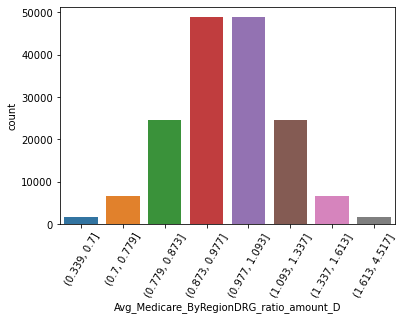

In [84]:
plt.figure(figsize=(6,4))
g = sns.countplot(x="Avg_Medicare_ByRegionDRG_ratio_amount_D", data=df9)
g.set_xticklabels(g.get_xticklabels(), rotation=60)

#### Thought process:
- If the ratio is larger than 1.613, then there is probably a fraudulent.

In [85]:
len(df9[df9['Avg_Medicare_ByRegionDRG_ratio_amount']>1.613])

1626

In [86]:
len(df9[df9['Avg_Medicare_ByRegionDRG_ratio_amount']>1.613]['Provider_Name'].unique())

191

In [87]:
df9[df9['Avg_Medicare_ByRegionDRG_ratio_amount']>1.613].head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Avg_Medicare_ByRegionDRG,Avg_Medicare_ByRegionDRG_ratio_amount,Avg_Medicare_ByRegionDRG_ratio_amount_D
59,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,40078,NATIONAL PARK MEDICAL CENTER,1910 MALVERN AVENUE,HOT SPRINGS,AR,71901,AR - Little Rock,18,9838.11,8533.83,5203.592222,1.639988,"(1.613, 4.517]"
456,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,210029,JOHNS HOPKINS BAYVIEW MEDICAL CENTER,4940 EASTERN AVENUE,BALTIMORE,MD,21224,MD - Baltimore,11,16878.45,15855.18,8233.980833,1.925579,"(1.613, 4.517]"
690,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,330195,LONG ISLAND JEWISH MEDICAL CENTER,270 - 05 76TH AVENUE,NEW HYDE PARK,NY,11040,NY - East Long Island,11,13895.09,13280.54,6942.507500,1.912931,"(1.613, 4.517]"
755,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,360059,METRO HEALTH MEDICAL CENTER,2500 METROHEALTH DRIVE,CLEVELAND,OH,44109,OH - Cleveland,12,9506.58,8660.25,5166.656667,1.676181,"(1.613, 4.517]"
928,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,450068,MEMORIAL HERMANN TEXAS MEDICAL CENTER,6411 FANNIN,HOUSTON,TX,77030,TX - Houston,16,10011.31,9097.62,5320.360000,1.709963,"(1.613, 4.517]"


### Section 3.10: Region, State & BRG Medicare Payments average <a class="anchor" id="Section_40"></a>
- Calculating average ratio of Average medicare payment of every Provider state and Hospital referral region desp in DRG description. This will help understand the average medical payments comparisons within the region and state.

In [88]:
benchmark = df.groupby(['Hospital_referral_region_desp','Provider_State','DRG'])['Average_Medicare_Payment'].mean().reset_index()
benchmark.columns = ['Hospital_referral_region_desp','Provider_State','DRG','Avg_Medicare_ByRegionStateDRG']
benchmark.head()

,Hospital_referral_region_desp,Provider_State,DRG,Avg_Medicare_ByRegionStateDRG
0,AK - Anchorage,AK,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,6413.780000
1,AK - Anchorage,AK,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,8081.540000
2,AK - Anchorage,AK,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,20555.255000
3,AK - Anchorage,AK,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,11140.963333
4,AK - Anchorage,AK,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,8258.427500


In [89]:
# add the new feature average total discharges to the dataset 
df10 = pd.merge(df, benchmark, how='left', on=['Hospital_referral_region_desp','Provider_State','DRG'])
# Feature 10: ratio of amount total medicare payment and average medicare payment by drg in a region and state
df10['Avg_Medicare_ByRegionStateDRG_ratio_amount'] = np.where(df10['Avg_Medicare_ByRegionStateDRG']==0,0, df10['Average_Medicare_Payment'] / df10['Avg_Medicare_ByRegionStateDRG'])
df10['Avg_Medicare_ByRegionStateDRG_ratio_amount'].describe()

count    163065.000000
mean          1.000000
std           0.172711
min           0.339831
25%           0.896815
50%           0.982208
75%           1.060028
max           4.516504
Name: Avg_Medicare_ByRegionStateDRG_ratio_amount, dtype: float64

In [90]:
var = 'Avg_Medicare_ByRegionStateDRG_ratio_amount'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df10[binned_var] = pd.qcut( df10[var], percentile)
df10[['Avg_Medicare_ByRegionStateDRG_ratio_amount_D']]

,Avg_Medicare_ByRegionStateDRG_ratio_amount_D
0,"(0.982, 1.089]"
1,"(0.982, 1.089]"
2,"(0.876, 0.982]"
3,"(0.876, 0.982]"
4,"(0.982, 1.089]"
...,...
163060,"(0.78, 0.876]"
163061,"(0.339, 0.7]"
163062,"(1.089, 1.331]"
163063,"(1.603, 4.517]"


[Text(0, 0, '(0.339, 0.7]'),
 Text(1, 0, '(0.7, 0.78]'),
 Text(2, 0, '(0.78, 0.876]'),
 Text(3, 0, '(0.876, 0.982]'),
 Text(4, 0, '(0.982, 1.089]'),
 Text(5, 0, '(1.089, 1.331]'),
 Text(6, 0, '(1.331, 1.603]'),
 Text(7, 0, '(1.603, 4.517]')]

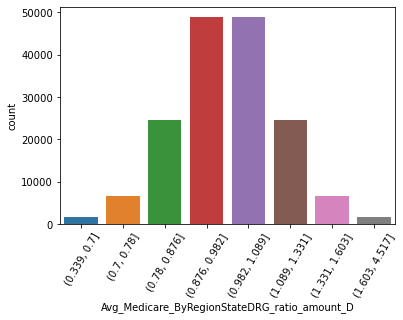

In [91]:
plt.figure(figsize=(6,4))
g = sns.countplot(x="Avg_Medicare_ByRegionStateDRG_ratio_amount_D", data=df10)
g.set_xticklabels(g.get_xticklabels(), rotation=60)

#### Thought process:
- If the ratio is larger than 1.603, then there is probably a fraudulent.

In [92]:
len(df10[df10['Avg_Medicare_ByRegionStateDRG_ratio_amount']>1.603])

1622

In [93]:
len(df10[df10['Avg_Medicare_ByRegionStateDRG_ratio_amount']>1.603]['Provider_Name'].unique())

186

In [94]:
df10[df10['Avg_Medicare_ByRegionStateDRG_ratio_amount']>1.603].head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Total_Payments,Average_Medicare_Payment,Avg_Medicare_ByRegionStateDRG,Avg_Medicare_ByRegionStateDRG_ratio_amount,Avg_Medicare_ByRegionStateDRG_ratio_amount_D
59,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,40078,NATIONAL PARK MEDICAL CENTER,1910 MALVERN AVENUE,HOT SPRINGS,AR,71901,AR - Little Rock,18,9838.11,8533.83,5203.592222,1.639988,"(1.603, 4.517]"
456,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,210029,JOHNS HOPKINS BAYVIEW MEDICAL CENTER,4940 EASTERN AVENUE,BALTIMORE,MD,21224,MD - Baltimore,11,16878.45,15855.18,8233.980833,1.925579,"(1.603, 4.517]"
690,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,330195,LONG ISLAND JEWISH MEDICAL CENTER,270 - 05 76TH AVENUE,NEW HYDE PARK,NY,11040,NY - East Long Island,11,13895.09,13280.54,6942.507500,1.912931,"(1.603, 4.517]"
755,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,360059,METRO HEALTH MEDICAL CENTER,2500 METROHEALTH DRIVE,CLEVELAND,OH,44109,OH - Cleveland,12,9506.58,8660.25,5166.656667,1.676181,"(1.603, 4.517]"
928,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,450068,MEMORIAL HERMANN TEXAS MEDICAL CENTER,6411 FANNIN,HOUSTON,TX,77030,TX - Houston,16,10011.31,9097.62,5320.360000,1.709963,"(1.603, 4.517]"


## Section 4: Conclusion <a class="anchor" id="Section_4"></a>

In the data preparation section, I imported and overviewed the shape and column names of the dataset, then I transformed data types into correct formats. After transforming the data types, In EDA section, I performed exploratory data analysis. To overview the distribution of outliers, I plotted the variable distributions. Another interesting finding is even though the number of hospital divisions in State Illinois and State Maryland are not ranking top in the State group bys, their hospital divisions rank the most when looking at the city group bys (Chicago and Baltimore).

Now we have some understanding of the dataset and numbers. It is time to create features to measure the outliers in the feature engineering section. In this assignment, I created 10 features in ratios to detect anomalies. According to the distributions of the 10 features, we can double confirm the dataset has anomalies.

The transaction aggregation strategy is used by incorporating a combination criteria when grouping transactions. Followed by calculating the average amount total discharges, average total payments and average medical payments to reveal some insights from the dataset.The thought process of these features is to determine the average ratios of one or more variables by dividing their average values by the actual amount. Hospital charges with low or average ratios are considered normal, while hospital charges with high ratios, meaning actual amounts significantly greater than average values, are flagged as potential fraud.

#### Average Total Payments 

- Feature 1: State & DRG Total Payment average - 1630 hospital average total payments within 295 health care providers charged more than other hospitals in a given state for a particular DRG and probably flagged as potential medical fraud or abuse.
- Feature 2: City & DRG Total Payment average - 1634 hospital average total payments within 210 health care providers charged more than other hospitals in a given city for a particular DRG and probably flagged as potential medical fraud or abuse.
- Feature 3: Region & DRG Total Payment average - 1630 hospital average total payments within 295 health care providers charged more than other hospitals in a given state for a particular DRG and probably flagged as potential  medical fraud or abuse.

##### According to the ratio, we are able to recognize how much higher and lower the spending amount of the individual hospital is compared to the Average Total Payment within the given state, city and region in each DRG category. 

#### Total Discharges

- Feature 4:State & DRG Total Discharges average - 1633 hospital discharges within 400 health care providers were more than other hospitals in a given state for a particular DRG and probably flagged as potential medical fraud or abuse.
- Feature 5: City & DRG Total Discharges average - 1634 hospital discharges within 210 health care providers were more than other hospitals in a given city for a particular DRG and probably flagged as potential medical fraud or abuse.
- Feature 6: Region & DRG Total Discharges average - 1624 hospital discharges within 294 health care providers were more than other hospitals in a given state for a particular DRG and probably flagged as potential medical fraud or abuse.

##### According to the ratio, we are able to recognize how much higher and lower the total discharges of the individual hospital is compared to the Total Discharges within the given state, city and region in each DRG category.

#### Medical Payment Average

- Feature 7: State & DRG Total Discharges average - 1632 hospital medical payment average within 205 health care providers charged more than other hospitals in a given state for a particular DRG and probably flagged as potential medical fraud or abuse.
- Feature 8: City & DRG Total Discharges average - 1625 hospital discharges within 134 health care providers were more than other hospitals in a given city for a particular DRG and probably flagged as poteintal medical fraud or abuse.
- Feature 9: Region & DRG Total Discharges average - 1626 hospital discharges within 191 health care providers were more than other hospitals in a given state for a particular DRG and probably flagged as potential medical fraud or abuse.
- Feature 10: Region, State & DRG Total Discharges average - 1622 hospital discharges within 186 health care providers were more than other hospitals in a given state and region for a particular DRG and probably flagged as potential medical fraud or abuse.

##### According to the ratio, we are able to recognize how much higher and lower the spending amount of the individual hospital is compared to the Medical Payment Average within the given state, city and region in each DRG category. 